In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab

import importlib
import data_processing_helper
importlib.reload(data_processing_helper)
from data_processing_helper import clean_index_names
from data_processing_helper import metaphlan_taxa_table
from data_processing_helper import sort_top_n

#### First, use metaphlan utility function to merge multiple sample profiles.
On Quest, the code looks like:

`$ module load metaphlan/4.0.1`

`$ merge_metaphlan_tables.py *_profile.txt > merged_abundance_table.txt`

#### Then use the following python code to process the merged abundance table:

In [9]:
# read from txt file
taxa_metaphlan4 = "merged_abundance_table.txt"
taxa_df = pd.read_csv(taxa_metaphlan4, delimiter = "\t",index_col=0, comment='#').astype(float)
# delete the first row, make data type float
#taxa_df = taxa_df.drop(["#SampleID"]).astype(float)
taxa_df.head()

,SRS014476-Supragingival_plaque,SRS014494-Posterior_fornix
k__Bacteria,100.00000,100.0
k__Bacteria|p__Actinobacteria,55.36506,0.0
k__Bacteria|p__Firmicutes,44.63494,100.0
k__Bacteria|p__Actinobacteria|c__Actinomycetia,55.36506,0.0
k__Bacteria|p__Firmicutes|c__Bacilli,44.63494,100.0


In [3]:
# get the lowest level names
taxa_df = clean_index_names(taxa_df, "|")
taxa_df.head()

,SRS014476-Supragingival_plaque,SRS014494-Posterior_fornix
k__Bacteria,100.00000,100.0
p__Actinobacteria,55.36506,0.0
p__Firmicutes,44.63494,100.0
c__Actinomycetia,55.36506,0.0
c__Bacilli,44.63494,100.0


In [8]:
# get dataframe for a desired taxa level
level = 'species'
level_df = metaphlan_taxa_table(taxa_df,level)
level_df.head()

,SRS014476-Supragingival_plaque,SRS014494-Posterior_fornix
Corynebacterium matruchotii,55.36506,0.00000
GGB10485 SGB49305,44.63494,0.00000
Lactobacillus crispatus,0.00000,77.36286
Lactobacillus iners,0.00000,21.60871
Lactobacillus jensenii,0.00000,1.02844


## Make stacked barplot

Text(0, 0.5, 'Relative abundance (%)')

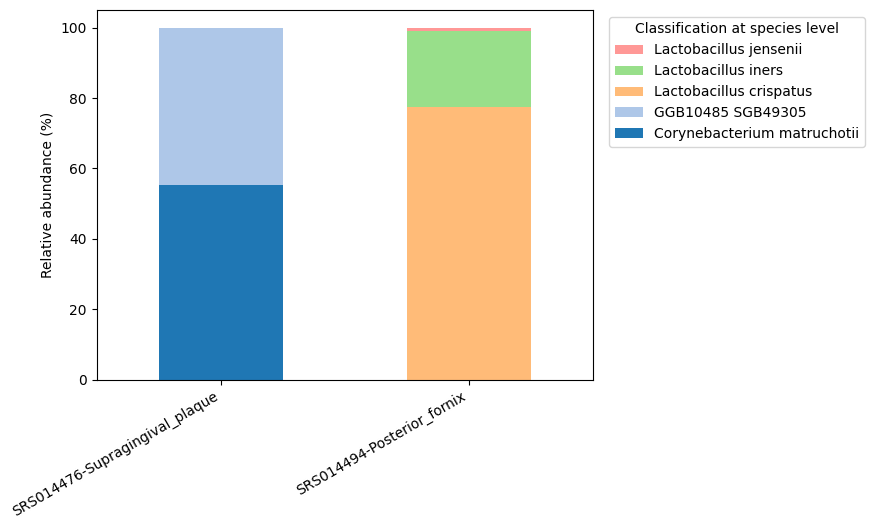

In [6]:
# top n taxa
n = 10
if len(level_df) <= n:
    topn_df = level_df
else:
    # from level_df, get top n taxa table and sum "Others"
    topn_df = sort_top_n(level_df,n)

# define number of colors for the bar plot
NUM_COLORS = n+1
# define colormap
cm = pylab.get_cmap('tab20')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

# make stacked bar plot
ax = topn_df.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),
          title = f'Classification at {level} level',
          bbox_to_anchor=(1.02, 1.0))
plt.ylabel("Relative abundance (%)")
